In [3]:
import math
import torch
import gpytorch
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


import GPE_ensemble as GPE

import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
#from GPErks.gp.data.dataset import Dataset
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.means import LinearMean
from gpytorch.kernels import RBFKernel, ScaleKernel
from torchmetrics import MeanSquaredError, R2Score
#from GPErks.gp.experiment import GPExperiment
#from GPErks.train.emulator import GPEmulator
#from GPErks.perks.inference import Inference
#from GPErks.train.early_stop import NoEarlyStoppingCriterion
#from GPErks.train.early_stop import (
#    GLEarlyStoppingCriterion,
#    PQEarlyStoppingCriterion,
#    UPEarlyStoppingCriterion,
#)
#from GPErks.train.early_stop import PkEarlyStoppingCriterion



%matplotlib inline
%load_ext autoreload
%autoreload 2

# set logger and enforce reproducibility
#from GPErks.log.logger import get_logger
#from GPErks.utils.random import set_seed
#log = get_logger()
seed = 7
#set_seed(seed)

In [4]:
mesh=41

In [5]:
x_labels=pd.read_csv(r'/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/EP/scenario_13/xlabels.txt',delim_whitespace=True,header=None)


X_all = pd.read_csv(r'/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/EP/scenario_'+str(mesh)+'/X.txt',index_col=None,delim_whitespace=True,header=None)
X_all.columns=x_labels.values.squeeze().tolist()
print(X_all)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/EP/scenario_41/X.txt'

In [4]:
y_labels=pd.read_csv(r'/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/EP/scenario_13/ylabels.txt',delim_whitespace=True,header=None)


y_all = pd.read_csv(r'/Users/pmzcwl/Library/CloudStorage/OneDrive-TheUniversityofNottingham/shared_simulations/EP/scenario_'+str(mesh)+'/Y.txt',index_col=None,delim_whitespace=True,header=None)
y_all.columns=y_labels.values.squeeze().tolist()
print(y_all)

        A_TAT     V_TAT
0    326.3430  100.5180
1    183.9530  130.7160
2     78.6365  115.3240
3    174.7200   86.9669
4    159.2430   95.3313
..        ...       ...
115  107.5570  140.7120
116  284.2610  182.8520
117  205.9150   73.8898
118  239.8420   80.7692
119  125.1910   97.1398

[120 rows x 2 columns]


# Emulator

In [5]:
input_masked = X_all.copy()

In [6]:
y_all

,A_TAT,V_TAT
0,326.3430,100.5180
1,183.9530,130.7160
2,78.6365,115.3240
3,174.7200,86.9669
4,159.2430,95.3313
...,...,...
115,107.5570,140.7120
116,284.2610,182.8520
117,205.9150,73.8898
118,239.8420,80.7692


In [7]:
y_train = torch.tensor(y_all.values)
x_train = torch.tensor(X_all[0:y_all.shape[0]].values)

In [8]:
y_train

tensor([[326.3430, 100.5180],
        [183.9530, 130.7160],
        [ 78.6365, 115.3240],
        [174.7200,  86.9669],
        [159.2430,  95.3313],
        [159.4960,  85.7816],
        [111.5320, 160.8760],
        [128.2950, 126.4680],
        [ 85.2694,  95.2810],
        [ 96.5890, 133.9790],
        [122.4770, 101.4700],
        [209.7640, 123.8980],
        [ 96.7988, 122.7850],
        [119.8950, 164.1450],
        [116.8980, 114.6310],
        [192.3800,  90.0702],
        [164.9690,  84.7386],
        [126.4440, 105.3290],
        [208.7870, 200.8810],
        [110.6070,  84.1817],
        [ 85.8296,  94.4645],
        [ 94.2734, 133.3010],
        [308.7260, 152.8160],
        [185.4290, 141.9500],
        [ 87.5541, 118.7400],
        [292.7550, 122.8820],
        [111.8240, 163.7690],
        [ 79.7282, 104.8940],
        [118.5210,  93.8477],
        [135.1400, 150.6880],
        [133.8990, 105.4380],
        [213.3040, 112.7240],
        [105.2660,  88.9114],
        [1

In [9]:
x_train.shape

torch.Size([120, 6])

In [10]:
emulator = GPE.ensemble(x_train,y_train,mean_func="linear",training_iter=500)

0
1


In [11]:
nDim = input_masked.shape[1]
boundsMaxMin = []
for i in range(nDim):
    boundsMaxMin.append([np.min(input_masked.iloc[:,i]),np.max(input_masked.iloc[:,i])])
    print(boundsMaxMin[i])

[0.382351, 0.799717]
[0.201679, 0.499831]
[1.24091, 8.38479]
[0.300623, 1.02851]
[0.200837, 0.497599]
[1.01838, 5.67135]


In [12]:
##### from SALib.sample import saltelli
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np

# Define the model inputs
problem = {
    'num_vars': nDim,
    'names': x_labels,
    'bounds': boundsMaxMin
    #'bounds': [[-1, 1],
     #          [-1, 1],
      #         [-1, 1],
       #        [-1, 1],
        #       [-1, 1],
         #      [-1, 1],
          #     [-1, 1],
           #    [-1, 1],
            #   [-1,1]]
}

# Generate samples
param_values = saltelli.sample(problem, 1024)

data1 = torch.tensor(param_values)
#data1.columns = X_train.columns

Ymean=emulator.predict(data1)

/var/folders/_j/ptyc01811q5b1dg30hshtfzh0000gr/T/ipykernel_5114/2553582652.py:24: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1024)


In [13]:
data1.shape

torch.Size([14336, 6])

In [14]:
Si = []
nMod = y_all.shape[1]
nDim = input_masked.shape[1]
for i in range(nMod):
    Si.append(sobol.analyze(problem, Ymean[:,i].detach().numpy(), print_to_console=True,calc_second_order=True))

                        ST   ST_conf
(CV_ventricles,)  0.000049  0.000008
(k_ventricles,)   0.000053  0.000010
(k_FEC,)          0.000222  0.000051
(CV_atria,)       0.936626  0.063274
(k_atria,)        0.026851  0.002912
(k_BB,)           0.040335  0.004415
                        S1   S1_conf
(CV_ventricles,)  0.000027  0.000565
(k_ventricles,)   0.000034  0.000667
(k_FEC,)          0.000037  0.001073
(CV_atria,)       0.930758  0.078838
(k_atria,)        0.022876  0.014430
(k_BB,)           0.035381  0.020392
Empty DataFrame
Columns: [S2, S2_conf]
Index: []
                        ST   ST_conf
(CV_ventricles,)  0.857304  0.058848
(k_ventricles,)   0.133861  0.014303
(k_FEC,)          0.015686  0.002082
(CV_atria,)       0.000117  0.000032
(k_atria,)        0.000565  0.000172
(k_BB,)           0.000040  0.000007
                        S1   S1_conf
(CV_ventricles,)  0.850844  0.069675
(k_ventricles,)   0.127834  0.028737
(k_FEC,)          0.013190  0.009847
(CV_atria,)      -0.000107

In [15]:
Si_first=np.zeros((nDim,nMod))
Si_total=np.zeros((nDim,nMod))
for i in range(nMod):
    total_Si, first_Si, second_Si = Si[i].to_df()
    Si_first[:,i] =  first_Si.iloc[:,0]
    Si_total[:,i] =  total_Si.iloc[:,0]


In [16]:
x_labels.values.squeeze().tolist()

['CV_ventricles', 'k_ventricles', 'k_FEC', 'CV_atria', 'k_atria', 'k_BB']

In [17]:
y_all.columns.tolist()

['A_TAT', 'V_TAT']

In [18]:
['PCa_b',
 'Tref',
 'perm50',
 'CV_ventricles',
 'a_ventricles',
 'EDP_lv',
 'EDP_rv',
 'Rsys',
 'Rpulm']

['PCa_b',
 'Tref',
 'perm50',
 'CV_ventricles',
 'a_ventricles',
 'EDP_lv',
 'EDP_rv',
 'Rsys',
 'Rpulm']

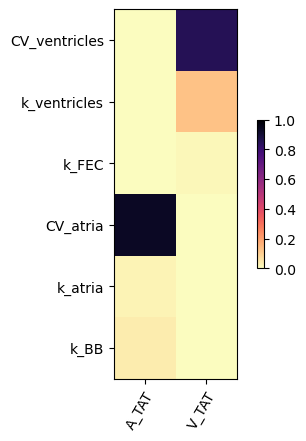

In [19]:
inputs = X_all.columns.tolist()
outputs = y_all.columns.tolist()
fig, ax = plt.subplots()
im = ax.imshow(Si_first[0:28],cmap='magma_r',vmin=0,vmax=1)

ax.set_xticks(np.arange(len(outputs)),labels=outputs)
ax.set_yticks(np.arange(len(inputs)), labels=inputs)
plt.setp(ax.get_xticklabels(), rotation=60, ha="right",
         rotation_mode="anchor");

plt.colorbar(im,fraction=0.015, pad=0.04)

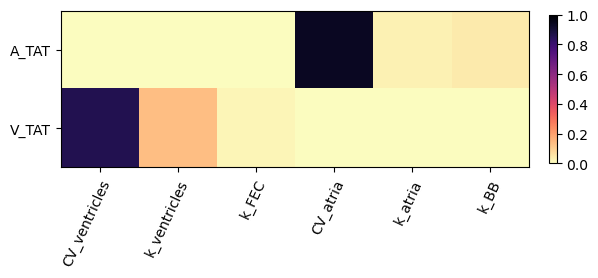

In [20]:
inputs = X_all.columns.tolist()
outputs = y_all.columns.tolist()
fig, ax = plt.subplots()
im = ax.imshow(Si_total.T[0:28],cmap='magma_r',vmin=0,vmax=1)

ax.set_yticks(np.arange(len(outputs)),labels=outputs)
ax.set_xticks(np.arange(len(inputs)), labels=inputs)
plt.setp(ax.get_xticklabels(), rotation=65, ha="right",
         rotation_mode="anchor");

plt.colorbar(im,fraction=0.015, pad=0.04)

In [21]:
np.savetxt("Si_total_EP_"+str(mesh)+".csv", Si_total, delimiter=",")
np.savetxt("Si_first_EP_"+str(mesh)+".csv", Si_first, delimiter=",")